## Problem Statement/Goal
 - (The problem statement below was copied, unedited, from [the contest page](https://www.analyticsvidhya.com/blog/2018/05/24-ultimate-data-science-projects-to-boost-your-knowledge-and-skills/))

 - Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

## Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
from warnings import filterwarnings

## Data Collection

In [3]:
# data was obtained at https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/
test_df  = pd.read_csv('./data/test_Y3wMUE5_7gLdaTN.csv')
raw_df = pd.read_csv('./data/train_u6lujuX_CVtuZ9i.csv')

## Initial Viewing of Data

In [4]:
raw_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
raw_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# Rows in which the applican't income is less than $1,000
mask = raw_df['ApplicantIncome'] < 1000
raw_df[mask]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
216,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135.0,360.0,1.0,Rural,N
468,LP002502,Female,Yes,2,Not Graduate,NaN,210,2917.0,98.0,360.0,1.0,Semiurban,Y
500,LP002603,Female,No,0,Graduate,No,645,3683.0,113.0,480.0,1.0,Rural,Y
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N


In [7]:
# First ten rows in which there are no Coapplicants
mask = raw_df['CoapplicantIncome'] == 0
raw_df[mask].head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
15,LP001032,Male,No,0,Graduate,No,4950,0.0,125.0,360.0,1.0,Urban,Y
16,LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,N
18,LP001038,Male,Yes,0,Not Graduate,No,4887,0.0,133.0,360.0,1.0,Rural,N
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N
25,LP001066,Male,Yes,0,Graduate,Yes,9560,0.0,191.0,360.0,1.0,Semiurban,Y
28,LP001086,Male,No,0,Not Graduate,No,1442,0.0,35.0,360.0,1.0,Urban,N


In [8]:
# Rows in which the Loan Amount Term is null
mask = raw_df['Loan_Amount_Term'].isnull()
raw_df[mask]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
19,LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
36,LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
44,LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
45,LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
73,LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
165,LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
197,LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
223,LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y
232,LP001770,Male,No,0,Not Graduate,No,3189,2598.0,120.0,NaN,1.0,Rural,Y


## Cleaning the Data

In [9]:
# THIS IS THE INITIALIZING OF THE CLEANED DATAFRAME
# Dummying categorical data and droping the Loan_ID
df = pd.get_dummies(raw_df.drop(['Loan_ID', 'Gender'], axis=1))

Keeping Loan_ID out for now, both because I don't suspect it to be important for to task and to help anonimize the process even further.  

Also Removing Gender because it would be unethical for that to be a factor for which a person can obtain a loan.

In [10]:
# Get Dummies comes equipt to automatically drop one of the dummie columns,
# However, I prefer to manually select which columns to drop.
df.drop(['Married_No',    
           'Dependents_0',
           'Education_Not Graduate',
           'Self_Employed_No',
           'Loan_Status_N']
          , axis=1, inplace = True)

In [11]:
# Feature Engeenering column for if there's a coapplicant or not
df['Coapplicant_True'] = df['CoapplicantIncome'].map(lambda x: 1 if x > 0 else 0)

In [12]:
filterwarnings("ignore") # Silencing warning about copying over the slice of DataFrame, for now.

# Filling Nulls
df['Credit_History'] = df['Credit_History'].fillna(0).map(lambda x: int(x))
df['LoanAmount']     = df['LoanAmount'].fillna(0).map(lambda x: int(x))

# While this isn't the most accurate representation of a non existent Loan Amount Term,
# This meathod allows us to keep all present nulls while being able to feature engineer later
df['Indefinite_Term'] = (df['Loan_Amount_Term'].isna())*1
df['Loan_Amount_Term'].fillna(600,inplace = True)

# Adding new column for ease of reading
df['Term_In_Years'] = df['Loan_Amount_Term'].fillna(0).map(lambda x: int(x/12))

In [13]:
# Renaming a few columns for easier reading.
df.rename({'Loan_Status_Y'     : "Target",
                 'Education_Graduate': "Graduate",
                 'Self_Employed_Yes' : "Self_Employed",
                 'Credit_History'    : "Good_Credit",
                 'Property_Area_Rural': 'Property_Rural',
                 'Property_Area_Semiurban': 'Property_Semiurban',
                 'Property_Area_Urban': 'Property_Urban'
                 }, axis = 1, inplace = True)

In [14]:
# Feature Engineering row for the percentage of monthly income the applicant would spend to pay off the loan

df['Payment_Percent'] = ((df['LoanAmount']*1000)/df['Loan_Amount_Term'])/df['ApplicantIncome']
df['Payment_Per_Month'] = ((df['LoanAmount']*1000)/df['Loan_Amount_Term']).round()

In [15]:
# Turning Floats into Ints for easier reading
df['CoapplicantIncome'] = df['CoapplicantIncome'].astype(int)#, copy = False)
df['Loan_Amount_Term']  = df['Loan_Amount_Term'].astype(int)
df['Payment_Per_Month'] = df['Payment_Per_Month'].astype(int)

## Exploritory Data Analysis

In [16]:
# EDA Functions
def list_corrs(df, target):
    return df.corr().sort_values([str(target)])[str(target)]

# Quick way to spid out the heatmap
def heatmap_correlations(df, size = 20):
    fig, ax = plt.subplots(figsize=(size,size))
    sns.heatmap(df.corr(), annot=True)
    return

# Function that states the % in each feature for which the Target is true
def percent_in_target(df, feature, target):
    total = df[feature] == 1
    mask = (df[target] == 1) & (df[feature] == 1)
    print("Percent of",str(feature), 'in', str(target), ':', int(len(df[mask]) / len(df[total])*100),"%")

In [18]:
# Seeing how many applicants are above X amount of payment percentage per month
percent = 0.50

count = 0
for i in df['Payment_Percent']:
    if i > percent:
        print(i)
        count += 1
print('')
print('Num of Applicants:',count)

0.6923837784371909
2.5
0.8712759977515458
0.5824877865464111
1.2368731845893581
1.2962962962962963
2.0
0.5853658536585366
0.661769571835087
4.674145299145299

Num of Applicants: 10


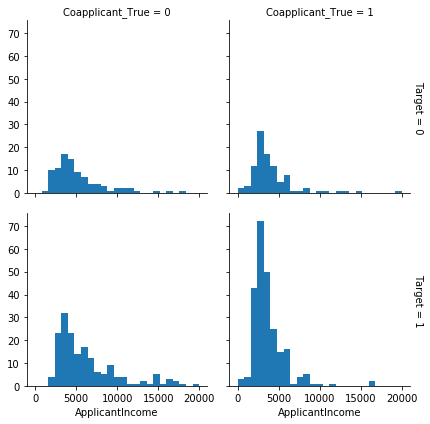

In [46]:
# Graphs of applicant income based on weather they have a coapplicant and if they recieved a loan.
Grid = sns.FacetGrid(df, col="Coapplicant_True", row="Target", margin_titles=True)
Grid.map(plt.hist,'ApplicantIncome', bins = 25, range = (0,20000));
# While the outliers reach out into the 80,000 range, 
# I have restricted this to 20,000 so the charts would be more readable.

In [21]:
dummies = ['Good_Credit', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Graduate',
       'Self_Employed', 'Property_Rural', 'Property_Semiurban',
       'Property_Urban', 'Coapplicant_True', 'Indefinite_Term']
for i in dummies:
    percent_in_target(df, i, 'Target')

Percent of Good_Credit in Target : 79 %
Percent of Married_Yes in Target : 71 %
Percent of Dependents_1 in Target : 64 %
Percent of Dependents_2 in Target : 75 %
Percent of Dependents_3+ in Target : 64 %
Percent of Graduate in Target : 70 %
Percent of Self_Employed in Target : 68 %
Percent of Property_Rural in Target : 61 %
Percent of Property_Semiurban in Target : 76 %
Percent of Property_Urban in Target : 65 %
Percent of Coapplicant_True in Target : 71 %
Percent of Indefinite_Term in Target : 57 %


In [22]:
print('Correlations to target')
list_corrs(df, 'Target')

Correlations to target


Property_Rural       -0.100694
Payment_Percent      -0.065106
CoapplicantIncome    -0.059188
Property_Urban       -0.043621
Dependents_1         -0.038740
Indefinite_Term      -0.038178
Loan_Amount_Term     -0.037607
Term_In_Years        -0.037607
Dependents_3+        -0.026123
LoanAmount           -0.010631
ApplicantIncome      -0.004710
Self_Employed        -0.003700
Payment_Per_Month     0.002412
Dependents_2          0.062384
Coapplicant_True      0.075165
Married_Yes           0.084281
Graduate              0.085884
Property_Semiurban    0.136540
Good_Credit           0.432616
Target                1.000000
Name: Target, dtype: float64

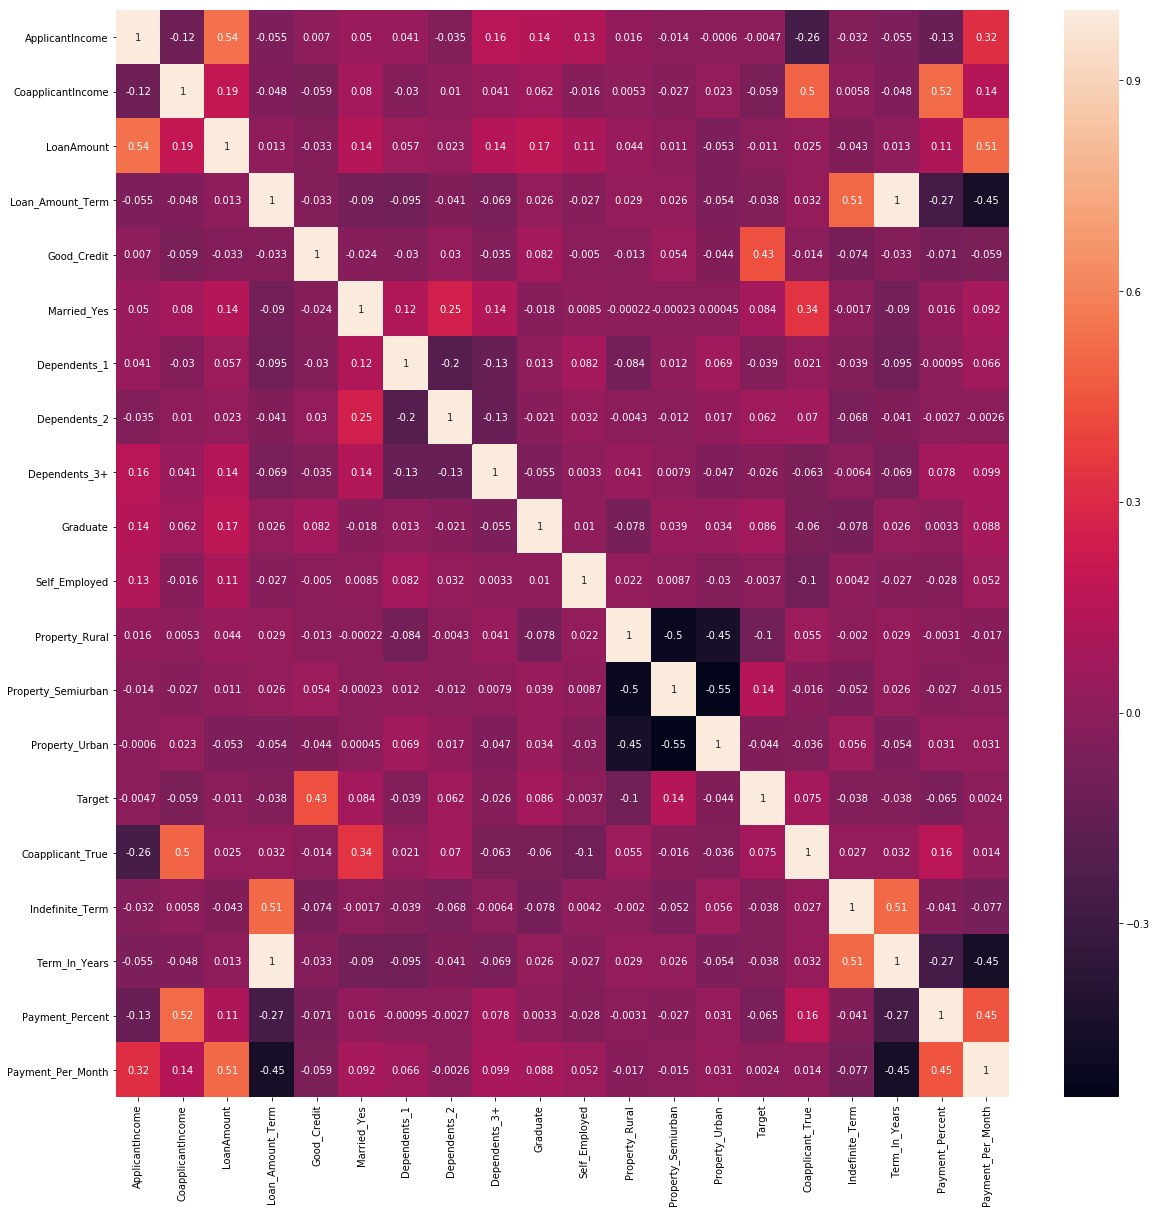

In [23]:
heatmap_correlations(df)

## Modeling

### Model Imports & Initiations

In [27]:
# Processing & Scoring
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier

In [28]:
# Function for easy and quick testing
def test_model(df, test_model, features, target = 'Target'):
    model = test_model
    X_train, X_test, y_train, y_test = train_test_split(df[features], df[target]) 
    model = model.fit(X_train,y_train)

    print('Train:', model.score(X_train,y_train))
    print('Test: ',  model.score(X_test,y_test))
    return


### Historical Lists of Features & Results

In [30]:
# This is our first set of features before any feature engineering or cutting down on less useful features
features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Good_Credit', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Graduate',
       'Self_Employed', 'Property_Rural', 'Property_Semiurban',
       'Property_Urban']
test_model(df, LogisticRegression(), features)
# This resulted in an accuracy of about 75% to 80%

Train: 0.7782608695652173
Test:  0.7662337662337663


In [31]:
# Second set.  Cutting down on less accurate features
features = ['Good_Credit', 'Property_Rural', 'Property_Semiurban', 'Property_Urban']

test_model(df, LogisticRegression(), features)
# Because the issues is that the bias is too high, the accuracy is about the same as the first, or slightly worse.

Train: 0.7847826086956522
Test:  0.7272727272727273


In [32]:
# Third set.  All columns (Sans Term_in_Years), with the addition of the engineered features
features = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Good_Credit', 'Married_Yes',
       'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Graduate',
       'Self_Employed', 'Property_Rural', 'Property_Semiurban',
       'Property_Urban', 'Coapplicant_True', 'Indefinite_Term'
            , 'Payment_Percent', 'Payment_Per_Month']

test_model(df, LogisticRegression(), features)
# Still not much of a change

Train: 0.7652173913043478
Test:  0.7857142857142857


In [33]:
corrs = df.corr()[['Target']]
mask = abs(corrs['Target']) > 0.04
features = [i for i in corrs[mask].index]
features.remove('Target')
test_model(df, LogisticRegression(), features)
# While I didn't expect much of a change here, I still wanted to try.
# I didn't expect this to improve the score because the issue isn't that there's 
# too much complexity in the model, but that there's not enough complexity.
# In data science terms: There is high bias, low variance.  The model is underfit.

Train: 0.7717391304347826
Test:  0.7337662337662337


In an effort to throw everything at the wall despite knowing that many of the following methods are I'll suited to this situation, I have added the following incase my Classifier is the thing that is not complex enough.

In [35]:
print('KNeighborsClassifier')
test_model(df, KNeighborsClassifier(), features)
print('DecisionTreeClassifier')
test_model(df, DecisionTreeClassifier(), features)
print('BaggingClassifier')
test_model(df, BaggingClassifier(), features)
print('RandomForestClassifier')
test_model(df, RandomForestClassifier(), features)
print('AdaBoostClassifier')
test_model(df, AdaBoostClassifier(), features)
print('ExtraTreesClassifier')
test_model(df, ExtraTreesClassifier(), features)

# These results were roughly what I expected
# Let's do some real feature engineering.

KNeighborsClassifier
Train: 0.741304347826087
Test:  0.7337662337662337
DecisionTreeClassifier
Train: 1.0
Test:  0.6623376623376623
BaggingClassifier
Train: 0.9760869565217392
Test:  0.6623376623376623
RandomForestClassifier
Train: 0.9782608695652174
Test:  0.6623376623376623
AdaBoostClassifier
Train: 0.8108695652173913
Test:  0.7532467532467533
ExtraTreesClassifier
Train: 1.0
Test:  0.6428571428571429


PolynomialFeatures takes each feature, and then creates a feature^2 column and creates columns out of the multiplied results of each feature_column multiplied by each other feature column.

In [36]:

poly = PolynomialFeatures(include_bias=False)                   # Init Poly Features
features = [i for i in df.columns if i != 'Target']       # Define Features
X = df[features]                                          # Define X
X_poly = poly.fit_transform(X)                                  # Fit & Transform X
X_poly = pd.DataFrame(X_poly, 
                    columns=poly.get_feature_names(features))   # Create a df to keep it easily understandable

X_poly.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Good_Credit,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Graduate,...,Indefinite_Term^2,Indefinite_Term Term_In_Years,Indefinite_Term Payment_Percent,Indefinite_Term Payment_Per_Month,Term_In_Years^2,Term_In_Years Payment_Percent,Term_In_Years Payment_Per_Month,Payment_Percent^2,Payment_Percent Payment_Per_Month,Payment_Per_Month^2
0,5849.0,0.0,0.0,360.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,900.0,0.000000,0.0,0.000000,0.000000,0.0
1,4583.0,1508.0,128.0,360.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,900.0,2.327442,10680.0,0.006019,27.618978,126736.0
2,3000.0,0.0,66.0,360.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,900.0,1.833333,5490.0,0.003735,11.183333,33489.0
3,2583.0,2358.0,120.0,360.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,900.0,3.871467,9990.0,0.016654,42.973287,110889.0
4,6000.0,0.0,141.0,360.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,900.0,1.958333,11760.0,0.004261,25.588889,153664.0


In [37]:
model    = LogisticRegression()
y        = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X_poly, y) 
model = model.fit(X_train, y_train)
#model.transform(X_test,y_test)

print('Train:', model.score(X_train, y_train))
print('Test: ', model.score(X_test, y_test))
# Welp.  That's unfortunate.

Train: 0.7760869565217391
Test:  0.7402597402597403


Some more code on what I've done on the modeling but isn't clean/annotated enough for me to want to move them out of the laboratory and into the finished code area.

# LABORATORY
 - This is where I keep all the code that I'm currently working on so as to keep the rest of the notebook clean

In [38]:
ss       = StandardScaler()
poly     = PolynomialFeatures(include_bias=False)                   # Init Poly Features
features = [i for i in df.columns if i != 'Target']       # Define Features
X        = df[features]                                          # Define X
X_s_poly = ss.fit_transform(X)
X_s_poly = poly.fit_transform(X_s_poly)                                  # Fit & Transform X
X_s_poly = pd.DataFrame(X_s_poly, 
                    columns=poly.get_feature_names(features))   # Create a df to keep it easily understandable

X_s_poly.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Good_Credit,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Graduate,...,Indefinite_Term^2,Indefinite_Term Term_In_Years,Indefinite_Term Payment_Percent,Indefinite_Term Payment_Per_Month,Term_In_Years^2,Term_In_Years Payment_Percent,Term_In_Years Payment_Per_Month,Payment_Percent^2,Payment_Percent Payment_Per_Month,Payment_Per_Month^2
0,0.072991,-0.554487,-1.599278,0.161632,0.540954,-1.357421,-0.446339,-0.443713,-0.300975,0.528362,...,0.023333,-0.02469,0.075238,0.134434,0.026125,-0.079611,-0.142249,0.242602,0.433480,0.774540
1,-0.134412,-0.038731,-0.149160,0.161632,0.540954,0.736691,2.240448,-0.443713,-0.300975,0.528362,...,0.023333,-0.02469,0.026737,0.029606,0.026125,-0.028291,-0.031327,0.030636,0.033924,0.037565
2,-0.393747,-0.554487,-0.851561,0.161632,0.540954,0.736691,-0.446339,-0.443713,-0.300975,0.528362,...,0.023333,-0.02469,0.037033,0.080548,0.026125,-0.039186,-0.085230,0.058777,0.127841,0.278055
3,-0.462062,0.251980,-0.239792,0.161632,0.540954,0.736691,-0.446339,-0.443713,-0.300975,-1.892641,...,0.023333,-0.02469,-0.005439,0.036379,0.026125,0.005755,-0.038493,0.001268,-0.008480,0.056717
4,0.097728,-0.554487,-0.001882,0.161632,0.540954,-1.357421,-0.446339,-0.443713,-0.300975,0.528362,...,0.023333,-0.02469,0.034428,0.019005,0.026125,-0.036430,-0.020110,0.050799,0.028042,0.015480


In [39]:
model    = LogisticRegression()
y        = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X_s_poly, y) 
model = model.fit(X_train, y_train)
#model.transform(X_test,y_test)

print('Train:', model.score(X_train, y_train))
print('Test: ', model.score(X_test, y_test))
# Hmm, overfit.  Better in a way, but not actually better.

Train: 0.85
Test:  0.7402597402597403


In [40]:
ss       = StandardScaler()
poly     = PolynomialFeatures(include_bias=False)                   # Init Poly Features
features = [i for i in df.columns if i != 'Target']       # Define Features
X        = df[features]                                          # Define X
X_p_scaled = poly.fit_transform(X)                                  # Fit & Transform X
X_p_scaled = ss.fit_transform(X_p_scaled)


X_p_scaled = pd.DataFrame(X_p_scaled, 
                    columns=poly.get_feature_names(features))   # Create a df to keep it easily understandable

X_p_scaled.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Good_Credit,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Graduate,...,Indefinite_Term^2,Indefinite_Term Term_In_Years,Indefinite_Term Payment_Percent,Indefinite_Term Payment_Per_Month,Term_In_Years^2,Term_In_Years Payment_Percent,Term_In_Years Payment_Per_Month,Payment_Percent^2,Payment_Percent Payment_Per_Month,Payment_Per_Month^2
0,0.072991,-0.554487,-1.599278,0.161632,0.540954,-1.357421,-0.446339,-0.443713,-0.300975,0.528362,...,-0.152753,-0.152753,-0.13874,-0.147079,0.059276,-0.668692,-1.599293,-0.079418,-0.129220,-0.132624
1,-0.134412,-0.038731,-0.149160,0.161632,0.540954,0.736691,2.240448,-0.443713,-0.300975,0.528362,...,-0.152753,-0.152753,-0.13874,-0.147079,0.059276,-0.163025,-0.147300,-0.072975,-0.097278,-0.097426
2,-0.393747,-0.554487,-0.851561,0.161632,0.540954,0.736691,-0.446339,-0.443713,-0.300975,0.528362,...,-0.152753,-0.152753,-0.13874,-0.147079,0.059276,-0.270377,-0.852904,-0.075421,-0.116286,-0.123323
3,-0.462062,0.251980,-0.239792,0.161632,0.540954,0.736691,-0.446339,-0.443713,-0.300975,-1.892641,...,-0.152753,-0.152753,-0.13874,-0.147079,0.059276,0.172434,-0.241109,-0.061590,-0.079520,-0.101827
4,0.097728,-0.554487,-0.001882,0.161632,0.540954,-1.357421,-0.446339,-0.443713,-0.300975,0.528362,...,-0.152753,-0.152753,-0.13874,-0.147079,0.059276,-0.243219,-0.000469,-0.074857,-0.099626,-0.089947


In [41]:
model    = LogisticRegression()
y        = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X_p_scaled, y) 
model = model.fit(X_train, y_train)
#model.transform(X_test,y_test)

print('Train:', model.score(X_train, y_train))
print('Test: ', model.score(X_test, y_test))
# Welp.  That's unfortunate.

Train: 0.8565217391304348
Test:  0.6883116883116883


In [42]:
df_engineered['Target'] = df['Target']
stated_corrs = df_engineered.corr()[['Target']].sort_values(['Target'])
stated_corrs.head(10)

NameError: name 'df_engineered' is not defined

In [43]:
stated_corrs.tail(10)

NameError: name 'stated_corrs' is not defined

In [255]:
# To see the amount and exact list of features within each range
df_engineered['Target'] = df['Target']
corrs = df_engineered.corr()[['Target']]

mask = abs(corrs['Target']) > 0.2
features = [i for i in corrs[mask].index]
features.remove('Target')
print(len(features))
features

9


['Good_Credit',
 'LoanAmount Good_Credit',
 'Loan_Amount_Term Good_Credit',
 'Good_Credit^2',
 'Good_Credit Married_Yes',
 'Good_Credit Graduate',
 'Good_Credit Property_Semiurban',
 'Good_Credit Coapplicant_True',
 'Good_Credit Term_In_Years']

In [263]:
ss         = StandardScaler()
poly       = PolynomialFeatures(include_bias=False)             # Init Poly Features
model      = LogisticRegression()

features   = [i for i in df.columns if i != 'Target']     # Define Features
X          = df[features]                                 # Define X
X_poly     = poly.fit_transform(X)                              # Fit & Transform X into X_poly
X_p_scaled = ss.fit_transform(X_poly)                           # X_poly scaled
df_eng = pd.DataFrame(X_p_scaled, 
                    columns=poly.get_feature_names(features))   # Create a df to keep it easily understandable
y          = df['Target']                                       # Defining y

df_eng['Target'] = df['Target']                           # Reattaching Target to deduce the correlations
#df_eng                                                         # Is entire engineered DF with Target

corrs       = df_eng.corr()[['Target']]                         # Correlating features to the Target & defining
#corrs                                                          # df of feature columns corrs to Target

mask        = abs(corrs['Target']) > 0.07                       # Setting Mask w/correlation limit

features    = [i for i in corrs[mask].index]                    # Creating list of features within that threshold
features.remove('Target')                                       # List of feature names within Correlation Limit w/o Target
features  

X_eng_corr  = df_eng[features]
X_eng_corr  # Engineered features with a limitation on only shoing those that are correlated

X_train, X_test, y_train, y_test = train_test_split(X_eng_corr, y) 
model = model.fit(X_train, y_train)

print('Train:    ', model.score(X_train, y_train))
print('Test:     ', model.score(X_test, y_test))
print('Cross Val:', cross_val_score(model, X_eng_corr, y).mean())
# Welp.  That's unfortunate.

Train:     0.8
Test:      0.7402597402597403
Cross Val: 0.7263589988841065


After trying a number of different correlation limits I've decided to return this project to the shelf.  Furthermore, I'm confident that after more review, and potentially reintroducing more ML models from KNN to Neural Net that I'll be more able to get a better score as I suspect that the accedental model below was the result of an accedental ensemble.

Unfortunatly in my mess I accedentally made a pretty solid model that performed well.  However, I didn't keep good enough track of how this happened and as such how I accedentally acomplished this is lost.
The code I had ran was:
 - cross_val_score(lr, X_poly, y).mean()
 - It resulted in an 0.84%
 - This has been a learning expierence for doing general work in the future and doing a better job of keeping everything new right below my most recent work

In [137]:
cross_val_score(lr, X_poly, y).mean()

0.843687230989957

Here endith the code that's been most recently run within the Laboratory but not moved to the model section.

In [135]:
model    = LogisticRegression()
features = [i for i in df.columns if i != 'Target']
X        = df[features]
y        = df['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y) 
model = model.fit_transform(X_train,y_train)
#model.transform(X_test,y_test)

print('Train:', model.score(X_train,y_train))
print('Test: ', model.score(X_test,y_test))


AttributeError: 'LogisticRegression' object has no attribute 'fit_transform'

In [59]:
model = test_model
log_reg = LogisticRegression()
#X_train, X_test, y_train, y_test = train_test_split(df[features], df[target]) 
model = log_reg.fit(df[features],df['Target'])

    #print('Train:', model.score(X_train,y_train))
    #print

In [126]:
# OMG, I forgot how much better Cross Validation Scores can help
X = df[features]
y = df['Target'] 
lr = LogisticRegression()
cross_val_score(lr, X, y).mean()

1.0

In [152]:
cross_val_score(lr, X_poly, y).mean()

0.7101626016260162

In [113]:
test_model(df, LogisticRegression(), X_poly)


ValueError: Must pass DataFrame with boolean values only

In [151]:
cross_val_score(lr, X_scaled, y).mean()

1.0

In [122]:
#ss.
# Can alsso try Lasso & Ridge
# Other Scaler?

array([2.92386485e+03, 4.18490722e-01, 4.77529318e-01, 3.70724253e-01,
       4.13051921e-01, 4.54467439e-01, 4.85257300e-01, 4.63594707e-01,
       4.96924194e-01, 2.44340003e-01, 8.72086058e+07, 2.32892212e+03,
       1.85071330e+03, 1.20644279e+03, 2.94060339e+03, 1.21781071e+03,
       1.56713778e+03, 1.73973202e+03, 2.92386485e+03, 7.86991716e+03,
       4.18490722e-01, 4.99989390e-01, 3.38405757e-01, 4.85658904e-01,
       4.16342842e-01, 4.60220934e-01, 4.86444761e-01, 4.94599424e-01,
       1.45131798e-01, 4.77529318e-01, 3.58502315e-01, 4.99989390e-01,
       3.91449096e-01, 4.30636263e-01, 4.98714514e-01, 4.96355378e-01,
       1.57318012e-01, 3.70724253e-01, 3.31180025e-01, 2.12133160e-01,
       2.37969007e-01, 3.29328687e-01, 3.05564545e-01, 7.08300828e-02,
       4.13051921e-01, 4.09676301e-01, 4.60220934e-01, 4.97102982e-01,
       4.93850716e-01, 2.41198189e-01, 4.54467439e-01, 1.00000000e+00,
       3.83480460e-01, 3.79339002e-01, 1.19755434e-01, 4.85257300e-01,
      

In [110]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X_poly)
#pd.DataFrame(X_scaled, columns=features).head()

In [161]:
list_corrs(df,'Target')

Property_Rural       -0.100694
Payment_Percent      -0.065106
CoapplicantIncome    -0.059188
Property_Urban       -0.043621
Dependents_1         -0.038740
Indefinite_Term      -0.038178
Loan_Amount_Term     -0.037607
Term_In_Years        -0.037607
Dependents_3+        -0.026123
Gender_Female        -0.017987
LoanAmount           -0.010631
ApplicantIncome      -0.004710
Self_Employed        -0.003700
Payment_Per_Month     0.002412
Dependents_2          0.062384
Coapplicant_True      0.075165
Married_Yes           0.084281
Graduate              0.085884
Property_Semiurban    0.136540
Good_Credit           0.432616
Target                1.000000
Name: Target, dtype: float64

In [150]:
# Code for listing Columns above the 0.05 threshold of correlation.
corrs = df.corr()[['Target']]
mask = abs(corrs['Target']) > 0.05

log_reg = LogisticRegression()
features = [i for i in corrs[mask].index]
y = df['Target']

model = log_reg.fit(X,y)
model.score(X,y)


0.7752442996742671

In [138]:
[i for i in corrs[mask].index]]

SyntaxError: invalid syntax (<ipython-input-138-a637977f4cc8>, line 1)

## Code Recycling Bin
 - For when I want to get old code out of the way, but am not yet confident about deleting it altogether.

In [44]:
Grid = sns.FacetGrid(df, col="Class_col_1", row="Class_col_2(Target)", margin_titles=True)
Grid.map(plt.hist,'Quantative_col', bins = 15);

KeyError: 'Class_col_2(Target)'